In [95]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

print(f"Tensorflow version: {tf.version.VERSION}")
tf.config.experimental.list_physical_devices('GPU')

Tensorflow version: 2.8.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras import optimizers, losses, metrics

In [97]:
UFC_Data = pd.read_csv('./ufc-master.csv')
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,Kick,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Kick,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0


In [98]:
#Where did i get this? from first project
def Categorize_Winner(df):
    df['Winner_Categorized'] = df['Winner'].astype('category')

    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

UFC_Data = Categorize_Winner(UFC_Data)
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0,0


In [99]:
#UFC_Data.isnull().sum()
df = pd.DataFrame(UFC_Data.dropna(axis='columns'))
df = pd.DataFrame(df.dropna())
df.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.54,-7.62,-7,1.98,0.1,0.74,1,1,Red,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,5.08,10.16,0,-0.93,1.0,-0.48,1,1,neither,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,5.08,-1,2.75,0.0,0.03,1,1,neither,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,-2.54,1,1.51,0.0,-2.75,1,1,neither,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,neither,0


In [100]:
#Where did i get this? From first project.
non_num = []
for col in df:
    if df[col].dtypes != "float64" and df[col].dtypes != "int64":
        non_num.append(col)
non_num.remove("Winner_Categorized")
df = pd.DataFrame(df.drop(columns = non_num))
df.head()


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [101]:
print(df.isna().sum(axis='rows'))

R_odds                          0
B_odds                          0
R_ev                            0
B_ev                            0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decis

In [102]:
print(df.isnull().sum(axis='rows'))

R_odds                          0
B_odds                          0
R_ev                            0
B_ev                            0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decis

In [103]:
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")
df.head()

It contains 0 infinite values


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [104]:
train_df, test_df = train_test_split(df, test_size = 0.3)
test_df, validation_df = train_test_split(test_df, test_size = 0.5)
print("Training Dataset Shape: ", train_df.shape)
print("Validation Dataset Shape: ", validation_df.shape)
print("Test Dataset Shape: ", test_df.shape)

Training Dataset Shape:  (3369, 59)
Validation Dataset Shape:  (722, 59)
Test Dataset Shape:  (722, 59)


In [105]:
#Class for him is Winner_Categorized for us
train_stats = train_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
R_odds,3369.0,-115.001187,266.671087,-1700.000000,-250.000000,-147.000000,125.000000,775.000000
B_odds,3369.0,63.757495,246.122437,-1200.000000,-145.000000,130.000000,215.000000,1300.000000
R_ev,3369.0,94.991764,82.237622,5.882353,40.000000,68.027211,125.000000,775.000000
B_ev,3369.0,165.679952,135.650972,8.333333,68.965517,130.000000,215.000000,1300.000000
no_of_rounds,3369.0,3.182250,0.571518,3.000000,3.000000,3.000000,3.000000,5.000000
B_current_lose_streak,3369.0,0.480558,0.766152,0.000000,0.000000,0.000000,1.000000,6.000000
B_current_win_streak,3369.0,0.869694,1.312714,0.000000,0.000000,0.000000,1.000000,12.000000
B_draw,3369.0,0.009202,0.098557,0.000000,0.000000,0.000000,0.000000,2.000000
B_longest_win_streak,3369.0,1.737608,1.841076,0.000000,0.000000,1.000000,3.000000,17.000000
B_losses,3369.0,1.699614,2.046085,0.000000,0.000000,1.000000,2.000000,15.000000


In [106]:
train_df.shape

(3369, 59)

In [107]:
Y_train = train_df.pop('Winner_Categorized')
Y_validation = validation_df.pop('Winner_Categorized')
Y_test = test_df.pop('Winner_Categorized')

In [108]:
train_stats = train_stats.transpose()
train_stats = train_stats.drop(columns = ['Winner_Categorized'])
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normalized_train_df = norm(train_df)
normalized_test_df = norm(test_df)
normalized_validation_df = norm(validation_df)

In [109]:
print("Train/Validation/Test Features")
print("Train: ", normalized_train_df.shape)
print("Validation: ", normalized_validation_df.shape)
print("Test: ", normalized_test_df.shape)

print("\nTrain/Validation/Test Labels")
print("Train: ", Y_train.shape)
print("Validation: ", Y_validation.shape)
print("Test: ", Y_test.shape)

Train/Validation/Test Features
Train:  (3369, 58)
Validation:  (722, 58)
Test:  (722, 58)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [110]:
def build_NN_model(model_optimizer, model_loss, first_HL_node_count, second_HL_node_count = 4, second_HL = False):

    #This is the Keras Model 
    model = Sequential()

    model.add(Input(shape = (normalized_train_df.shape[1],)))
    model.add(Dense(first_HL_node_count, Activation('relu')))
    if second_HL:
        model.add(Dense(second_HL_node_count, Activation('relu')))

    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid')) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [111]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions
model_loss = losses.BinaryCrossentropy()
learning_rate = 0.01
model_optimizer = optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)
first_HL_node_count = 16
second_HL = False

model = build_NN_model(model_optimizer=model_optimizer, model_loss=model_loss, first_HL_node_count=first_HL_node_count, second_HL=second_HL)
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 16)                944       
                                                                 
 dense_53 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [112]:
EPOCHS = 100
batch_sz = 100

In [113]:
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 3s 37ms/step - loss: nan - accuracy: 0.4239 - val_loss: nan - val_accuracy: 0.4169
Epoch 2/100
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4169
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4252 - val_loss: nan - val_accuracy: 0.4169
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4179 - val_loss: nan - val_accuracy: 0.4169
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4209 - val_loss: nan - val_accuracy: 0.4169
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4228 - val_loss: nan - val_accuracy: 0.4169
Epoch 7/100
33/33 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.4215 - val_loss: nan - val_accuracy: 0.4169
Epoch 8/100
33/33 [=============================

In [114]:
print('Summary of results after each epoch:')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

Summary of results after each epoch:
    loss  accuracy  val_loss  val_accuracy  epoch
0    NaN  0.423939       NaN      0.416898      0
1    NaN  0.412970       NaN      0.416898      1
2    NaN  0.425206       NaN      0.416898      2
3    NaN  0.417865       NaN      0.416898      3
4    NaN  0.420924       NaN      0.416898      4
..   ...       ...       ...           ...    ...
95   NaN  0.413582       NaN      0.416898     95
96   NaN  0.423983       NaN      0.416898     96
97   NaN  0.423677       NaN      0.416898     97
98   NaN  0.411135       NaN      0.416898     98
99   NaN  0.425206       NaN      0.416898     99

[100 rows x 5 columns]


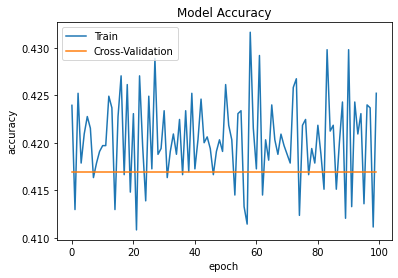

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

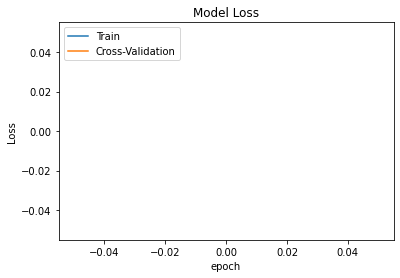

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

In [117]:
print("Train Split:")
loss, accuracy = model.evaluate(normalized_train_df, Y_train, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Train Split:
106/106 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.4203
Accuracy:  0.42


In [118]:
print("Validation Split:")
loss, accuracy = model.evaluate(normalized_validation_df, Y_validation, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Validation Split:
23/23 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4169
Accuracy:  0.42


In [119]:
print("Test Split:")
loss, accuracy = model.evaluate(normalized_test_df, Y_test, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Test Split:
23/23 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.3961
Accuracy:  0.40


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

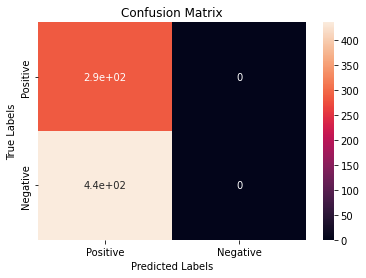

In [120]:
ax = plt.subplot()
predict_results = model.predict(normalized_test_df)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(Y_test, predict_results)

sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [121]:
def build_NN2_model(model_optimizer, model_loss):

    #This is the Keras Model 
    model = Sequential()

    model.add(Input(shape = (normalized_train_df.shape[1],)))
    model.add(Dense(32, Activation('relu')))
    model.add(Dense(24, Activation('relu')))
    model.add(Dense(16, Activation('relu')))
    model.add(Dense(8, Activation('relu')))
    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid')) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [122]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions
model_loss = losses.BinaryCrossentropy()
learning_rate = 0.01
model_optimizer = optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)

model = build_NN2_model(model_optimizer=model_optimizer, model_loss=model_loss)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                1888      
                                                                 
 dense_55 (Dense)            (None, 24)                792       
                                                                 
 dense_56 (Dense)            (None, 16)                400       
                                                                 
 dense_57 (Dense)            (None, 8)                 136       
                                                                 
 dense_58 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,225
Trainable params: 3,225
Non-trainable params: 0
_________________________________________________________________


In [123]:
EPOCHS = 10
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/10
33/33 [==============================] - 3s 41ms/step - loss: nan - accuracy: 0.4185 - val_loss: nan - val_accuracy: 0.4169
Epoch 2/10
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4212 - val_loss: nan - val_accuracy: 0.4169
Epoch 3/10
33/33 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.4185 - val_loss: nan - val_accuracy: 0.4169
Epoch 4/10
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4169
Epoch 5/10
33/33 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4163 - val_loss: nan - val_accuracy: 0.4169
Epoch 6/10
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4319 - val_loss: nan - val_accuracy: 0.4169
Epoch 7/10
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4102 - val_loss: nan - val_accuracy: 0.4169
Epoch 8/10
33/33 [==============================] - 1s 

In [124]:
#https://www.youtube.com/watch?v=p3CcfIjycBA&t=61s
def build_NN3_model():

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(32, input_dim = len(normalized_train_df.columns), activation = 'relu'))
    model.add(Dropout(0.25))
    #model.add(Dense(32, Activation('relu')))
    #model.add(Dense(24, Activation('relu')))
    #model.add(Dense(16, Activation('relu')))
    #model.add(Dense(8, Activation('relu')))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [125]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN3_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                1888      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_60 (Dense)            (None, 1)                 33        
                                                                 
 activation_46 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [126]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 3s 33ms/step - loss: nan - accuracy: 0.4212 - val_loss: nan - val_accuracy: 0.4169
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4203 - val_loss: nan - val_accuracy: 0.4169
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4209 - val_loss: nan - val_accuracy: 0.4169
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4212 - val_loss: nan - val_accuracy: 0.4169
Epoch 5/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4145 - val_loss: nan - val_accuracy: 0.4169
Epoch 6/100
33/33 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4209 - val_loss: nan - val_accuracy: 0.4169
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4173 - val_loss: nan - val_accuracy: 0.4169
Epoch 8/100
33/33 [=============================

In [127]:
#https://www.youtube.com/watch?v=p3CcfIjycBA&t=61s
def build_NN4_model():

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(128, input_dim = len(normalized_train_df.columns), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [128]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN4_model()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 128)               7552      
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 activation_47 (Activation)  (None, 64)                0         
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 activation_48 (Activation)  (None, 32)              

In [129]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 4s 47ms/step - loss: nan - accuracy: 0.4209 - val_loss: nan - val_accuracy: 0.4169
Epoch 2/100
33/33 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.4197 - val_loss: nan - val_accuracy: 0.4169
Epoch 3/100
33/33 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.4237 - val_loss: nan - val_accuracy: 0.4169
Epoch 4/100
33/33 [==============================] - 1s 27ms/step - loss: nan - accuracy: 0.4203 - val_loss: nan - val_accuracy: 0.4169
Epoch 5/100
33/33 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.4203 - val_loss: nan - val_accuracy: 0.4169
Epoch 6/100
33/33 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.4197 - val_loss: nan - val_accuracy: 0.4169
Epoch 7/100
33/33 [==============================] - 1s 28ms/step - loss: nan - accuracy: 0.4166 - val_loss: nan - val_accuracy: 0.4169
Epoch 8/100
33/33 [=============================

In [130]:
#https://www.youtube.com/watch?v=WakvH7oMvPw
#have/had no clue what was going on, what could be the problem to the model
#no where to even think about trying to get to solve this problem
#Watched vid and says that regression problems are hard to get working
#because the nature of the problem leaves you prone to exploding gradients dilemma
#Says logistic regression problems are prone to exploding gradients problem
#generally, im thinking that if you send the neural network as much info as possible, then it will work better
#just throwing the NN as much info as possible jumbled up and just expecting it to be solved will not ever work, even in this situation
def build_NN5_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [131]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN4_model()
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 128)               7552      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 activation_53 (Activation)  (None, 64)                0         
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 activation_54 (Activation)  (None, 32)              

In [132]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 5s 48ms/step - loss: nan - accuracy: 0.4209 - val_loss: nan - val_accuracy: 0.4169
Epoch 2/100
33/33 [==============================] - 1s 30ms/step - loss: nan - accuracy: 0.4197 - val_loss: nan - val_accuracy: 0.4169
Epoch 3/100
33/33 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.4240 - val_loss: nan - val_accuracy: 0.4169
Epoch 4/100
33/33 [==============================] - 1s 24ms/step - loss: nan - accuracy: 0.4169 - val_loss: nan - val_accuracy: 0.4169
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4194 - val_loss: nan - val_accuracy: 0.4169
Epoch 6/100
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4191 - val_loss: nan - val_accuracy: 0.4169
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4240 - val_loss: nan - val_accuracy: 0.4169
Epoch 8/100
33/33 [=============================

In [133]:
df_7 = pd.DataFrame(UFC_Data, columns = ["age_dif", "win_streak_dif", "avg_td_dif", "Winner_Categorized"])

In [134]:
train_df_7, test_df_7 = train_test_split(df_7, test_size = 0.3)
test_df_7, validation_df_7 = train_test_split(test_df_7, test_size = 0.5)
print("Training Dataset Shape: ", train_df_7.shape)
print("Validation Dataset Shape: ", validation_df_7.shape)
print("Test Dataset Shape: ", test_df_7.shape)

Training Dataset Shape:  (3369, 4)
Validation Dataset Shape:  (722, 4)
Test Dataset Shape:  (722, 4)


In [135]:
Y_train_7 = train_df_7.pop('Winner_Categorized')
Y_validation_7 = validation_df_7.pop('Winner_Categorized')
Y_test_7 = test_df_7.pop('Winner_Categorized')

In [136]:
#Class for him is Winner_Categorized for us
train_stats_7 = train_df_7.describe()
#train_stats_7 = train_stats_7.drop(columns = ['Winner_Categorized'])
train_stats_7 = train_stats_7.transpose()

def norm_7(x):
    return (x - train_stats_7['mean']) / train_stats_7['std']

normalized_train_df_7 = norm_7(train_df_7)
normalized_test_df_7 = norm_7(test_df_7)
normalized_validation_df_7 = norm_7(validation_df_7)

In [137]:
print("Train/Validation/Test Features (DataFrame 7)")
print("Train: ", normalized_train_df_7.shape)
print("Validation: ", normalized_validation_df_7.shape)
print("Test: ", normalized_test_df_7.shape)

print("\nTrain/Validation/Test Labels (DataFrame 7)")
print("Train: ", Y_train_7.shape)
print("Validation: ", Y_validation_7.shape)
print("Test: ", Y_test_7.shape)

Train/Validation/Test Features (DataFrame 7)
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels (DataFrame 7)
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [138]:
def build_NN5_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df_7.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [139]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN5_model()
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 1024)              4096      
                                                                 
 activation_59 (Activation)  (None, 1024)              0         
                                                                 
 dropout_46 (Dropout)        (None, 1024)              0         
                                                                 
 dense_76 (Dense)            (None, 512)               524800    
                                                                 
 activation_60 (Activation)  (None, 512)               0         
                                                                 
 dropout_47 (Dropout)        (None, 512)               0         
                                                                 
 dense_77 (Dense)            (None, 256)             

In [140]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df_7,
        Y_train_7,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df_7.shape[0] / batch_sz),
        validation_data = (normalized_validation_df_7, Y_validation_7),
    )

Epoch 1/100
33/33 [==============================] - 3s 36ms/step - loss: 0.5652 - accuracy: 0.4218 - val_loss: 0.5538 - val_accuracy: 0.4114
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 0.5354 - accuracy: 0.4240 - val_loss: 0.5220 - val_accuracy: 0.4211
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 0.5045 - accuracy: 0.4659 - val_loss: 0.4916 - val_accuracy: 0.5319
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4795 - accuracy: 0.5519 - val_loss: 0.4659 - val_accuracy: 0.5693
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: 0.4630 - accuracy: 0.5879 - val_loss: 0.4527 - val_accuracy: 0.5956
Epoch 6/100
33/33 [==============================] - 1s 22ms/step - loss: 0.4530 - accuracy: 0.5919 - val_loss: 0.4460 - val_accuracy: 0.5914
Epoch 7/100
33/33 [==============================] - 1s 22ms/step - loss: 0.4510 - accuracy: 0.5879 - val_loss: 0.4408 - val_accuracy: 0.5886
Epoch 

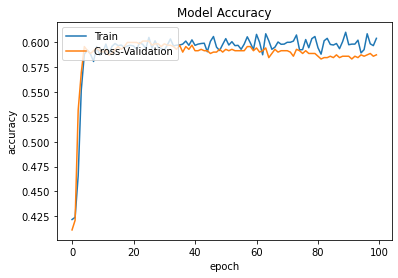

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

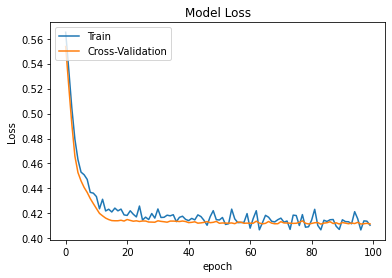

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

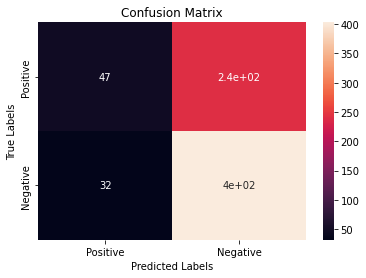

In [143]:
ax = plt.subplot()
predict_results = model.predict(normalized_test_df_7)
#print(predict_results)
predict_results = (predict_results > 0.5).astype(int)
#print(predict_results)
#print(Y_test_7)
cm = confusion_matrix(Y_test_7, predict_results)

sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [144]:
def norm(x, train_stats):
    return (x - train_stats['mean']) / train_stats['std']

def split_and_normalize(df):
    train_df, test_df = train_test_split(df, test_size = 0.3)
    test_df, validation_df = train_test_split(test_df, test_size = 0.5)
    train_label = train_df.pop('Winner_Categorized')
    validation_label = validation_df.pop('Winner_Categorized')
    test_label = test_df.pop('Winner_Categorized')
    train_stats = train_df.describe()
    train_stats = train_stats.transpose()
    normalized_train_df = norm(train_df, train_stats)
    normalized_test_df = norm(test_df, train_stats)
    normalized_validation_df = norm(validation_df, train_stats)
    return normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label

def show_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
    plt.show()

def show_loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
    plt.show()

def accuracy_loss_measurements():
    print("\n")
    loss, accuracy = model.evaluate(normalized_train_df, train_label)
    print("Training Accuracy (Final Model): {:5.3f}".format(accuracy))
    print("Training Loss (Final Model): {:5.3f}".format(loss))

    print("\n")
    loss, accuracy = model.evaluate(normalized_validation_df, validation_label)
    print("Validation Accuracy (Final Model): {:5.3f}".format(accuracy))
    print("Validation Loss (Final Model): {:5.3f}".format(loss))

    print("\n")
    loss, accuracy = model.evaluate(normalized_test_df, test_label)
    print("Test Accuracy (Final Model): {:5.3f}".format(accuracy))
    print("Test Loss (Final Model): {:5.3f}".format(loss))

def train_validation_test_shape():
    print("\nTrain/Validation/Test Features")
    print("Train: ", normalized_train_df.shape)
    print("Validation: ", normalized_validation_df.shape)
    print("Test: ", normalized_test_df.shape)

    print("\nTrain/Validation/Test Labels")
    print("Train: ", Y_train.shape)
    print("Validation: ", Y_validation.shape)
    print("Test: ", Y_test.shape)

def show_confusion_matrix(test_set_x, test_set_y):
    ax = plt.subplot()
    predict_results = model.predict(test_set_x)

    predict_results = (predict_results > 0.5)

    cm = confusion_matrix(test_set_y, predict_results)

    sns.heatmap(cm, annot = True, ax = ax)

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [145]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df)

print("\nTrain/Validation/Test Features")
print("Train: ", normalized_train_df.shape)
print("Validation: ", normalized_validation_df.shape)
print("Test: ", normalized_test_df.shape)

print("\nTrain/Validation/Test Labels")
print("Train: ", Y_train.shape)
print("Validation: ", Y_validation.shape)
print("Test: ", Y_test.shape)


Train/Validation/Test Features
Train:  (3369, 58)
Validation:  (722, 58)
Test:  (722, 58)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [146]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df_7)
train_validation_test_shape()


Train/Validation/Test Features
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [147]:
def build_NN6_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [148]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN6_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 1024)              4096      
                                                                 
 activation_62 (Activation)  (None, 1024)              0         
                                                                 
 dropout_49 (Dropout)        (None, 1024)              0         
                                                                 
 dense_80 (Dense)            (None, 512)               524800    
                                                                 
 activation_63 (Activation)  (None, 512)               0         
                                                                 
 dropout_50 (Dropout)        (None, 512)               0         
                                                                 
 dense_81 (Dense)            (None, 256)             

In [149]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_6 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 33ms/step - loss: 0.5559 - accuracy: 0.4221 - val_loss: 0.5574 - val_accuracy: 0.3947
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.5205 - accuracy: 0.4451 - val_loss: 0.5134 - val_accuracy: 0.4626
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4881 - accuracy: 0.5243 - val_loss: 0.4782 - val_accuracy: 0.5346
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4652 - accuracy: 0.5867 - val_loss: 0.4617 - val_accuracy: 0.5609
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: 0.4593 - accuracy: 0.5852 - val_loss: 0.4545 - val_accuracy: 0.5873
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4539 - accuracy: 0.5904 - val_loss: 0.4484 - val_accuracy: 0.5942
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4434 - accuracy: 0.5956 - val_loss: 0.4410 - val_accuracy: 0.5928
Epoch 

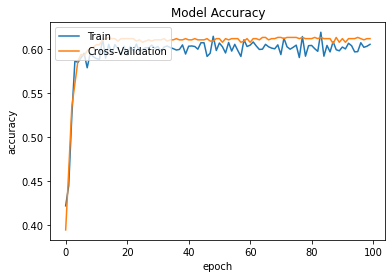

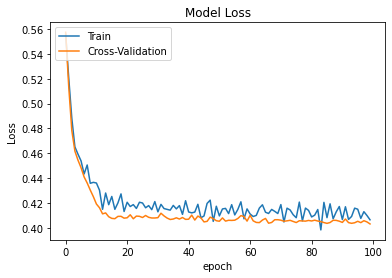



106/106 [==============================] - 1s 10ms/step - loss: 0.4050 - accuracy: 0.6043
Training Accuracy (Final Model): 0.604
Training Loss (Final Model): 0.405


23/23 [==============================] - 0s 10ms/step - loss: 0.4031 - accuracy: 0.6122
Validation Accuracy (Final Model): 0.612
Validation Loss (Final Model): 0.403


23/23 [==============================] - 0s 10ms/step - loss: 0.4104 - accuracy: 0.5956
Test Accuracy (Final Model): 0.596
Test Loss (Final Model): 0.410


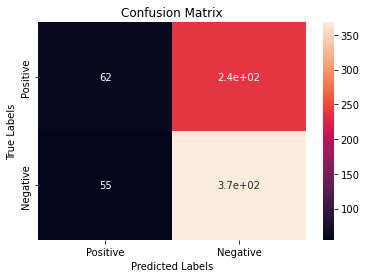

In [150]:
show_accuracy_plot(history_6)
show_loss_plot(history_6)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [151]:
df_8 = pd.DataFrame(df, columns = ['age_dif', 'win_streak_dif', 'avg_td_dif', 'reach_dif', 'loss_dif', 'sig_str_dif', 'total_round_dif', 'Winner_Categorized'])
df_8.head()

,age_dif,win_streak_dif,avg_td_dif,reach_dif,loss_dif,sig_str_dif,total_round_dif,Winner_Categorized
0,-7,0,0.74,-7.62,-4,1.98,-4,0
1,0,0,-0.48,10.16,0,-0.93,0,1
2,-1,0,0.03,5.08,1,2.75,3,0
3,1,0,-2.75,-2.54,0,1.51,0,0
4,2,-1,6.25,-5.08,-3,-2.63,-24,0


In [152]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df_8)
train_validation_test_shape()



Train/Validation/Test Features
Train:  (3369, 7)
Validation:  (722, 7)
Test:  (722, 7)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [153]:
def build_NN8_model():

    model = Sequential()

    model.add(Dense(32, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',             
        metrics=['accuracy']
    )
    return model

In [154]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN8_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 32)                256       
                                                                 
 activation_65 (Activation)  (None, 32)                0         
                                                                 
 dropout_52 (Dropout)        (None, 32)                0         
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 activation_66 (Activation)  (None, 16)                0         
                                                                 
 dropout_53 (Dropout)        (None, 16)                0         
                                                                 
 dense_85 (Dense)            (None, 1)               

In [155]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_8 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 36ms/step - loss: 0.7528 - accuracy: 0.5348 - val_loss: 0.6723 - val_accuracy: 0.5789
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.7281 - accuracy: 0.5286 - val_loss: 0.6690 - val_accuracy: 0.5928
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.7105 - accuracy: 0.5589 - val_loss: 0.6677 - val_accuracy: 0.5873
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 0.7139 - accuracy: 0.5515 - val_loss: 0.6679 - val_accuracy: 0.5873
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6927 - accuracy: 0.5681 - val_loss: 0.6680 - val_accuracy: 0.5873
Epoch 6/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6881 - accuracy: 0.5681 - val_loss: 0.6686 - val_accuracy: 0.5845
Epoch 7/100
33/33 [==============================] - 1s 19ms/step - loss: 0.6744 - accuracy: 0.5818 - val_loss: 0.6685 - val_accuracy: 0.5789
Epoch 

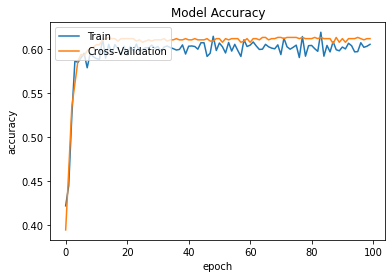

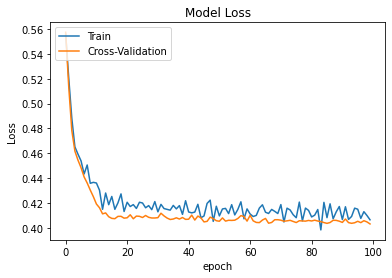



106/106 [==============================] - 1s 11ms/step - loss: 0.6575 - accuracy: 0.6165
Training Accuracy (Final Model): 0.617
Training Loss (Final Model): 0.658


23/23 [==============================] - 0s 10ms/step - loss: 0.6685 - accuracy: 0.5845
Validation Accuracy (Final Model): 0.584
Validation Loss (Final Model): 0.669


23/23 [==============================] - 1s 17ms/step - loss: 0.6607 - accuracy: 0.6066
Test Accuracy (Final Model): 0.607
Test Loss (Final Model): 0.661


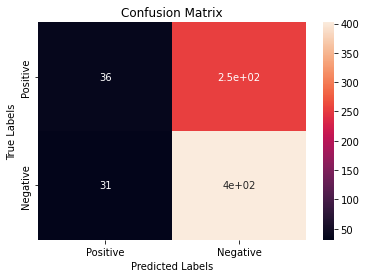

In [156]:
show_accuracy_plot(history_6)
show_loss_plot(history_6)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [157]:
def build_NN9_model():

    model = Sequential()

    model.add(Dense(24, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',             
        metrics=['accuracy']
    )
    return model

In [158]:
model = build_NN9_model()
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 24)                192       
                                                                 
 activation_68 (Activation)  (None, 24)                0         
                                                                 
 dropout_54 (Dropout)        (None, 24)                0         
                                                                 
 dense_87 (Dense)            (None, 16)                400       
                                                                 
 activation_69 (Activation)  (None, 16)                0         
                                                                 
 dropout_55 (Dropout)        (None, 16)                0         
                                                                 
 dense_88 (Dense)            (None, 1)               

In [159]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_9 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 37ms/step - loss: 0.7018 - accuracy: 0.5230 - val_loss: 0.6777 - val_accuracy: 0.5873
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6840 - accuracy: 0.5619 - val_loss: 0.6747 - val_accuracy: 0.5831
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6780 - accuracy: 0.5766 - val_loss: 0.6718 - val_accuracy: 0.5873
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 0.6745 - accuracy: 0.5794 - val_loss: 0.6710 - val_accuracy: 0.5928
Epoch 5/100
33/33 [==============================] - 1s 16ms/step - loss: 0.6730 - accuracy: 0.5886 - val_loss: 0.6690 - val_accuracy: 0.5900
Epoch 6/100
33/33 [==============================] - 1s 16ms/step - loss: 0.6706 - accuracy: 0.5907 - val_loss: 0.6687 - val_accuracy: 0.5900
Epoch 7/100
33/33 [==============================] - 1s 16ms/step - loss: 0.6701 - accuracy: 0.5852 - val_loss: 0.6678 - val_accuracy: 0.5942
Epoch 

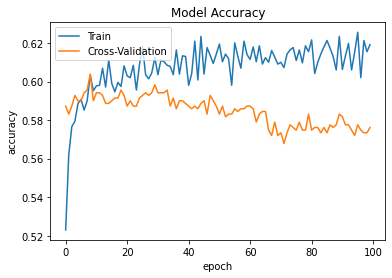

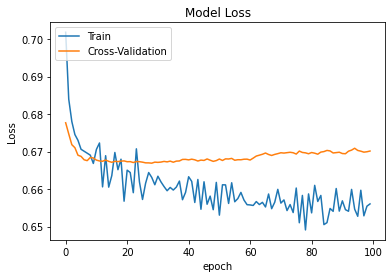



106/106 [==============================] - 1s 10ms/step - loss: 0.6490 - accuracy: 0.6221
Training Accuracy (Final Model): 0.622
Training Loss (Final Model): 0.649


23/23 [==============================] - 0s 10ms/step - loss: 0.6701 - accuracy: 0.5762
Validation Accuracy (Final Model): 0.576
Validation Loss (Final Model): 0.670


23/23 [==============================] - 0s 10ms/step - loss: 0.6615 - accuracy: 0.6205
Test Accuracy (Final Model): 0.620
Test Loss (Final Model): 0.662


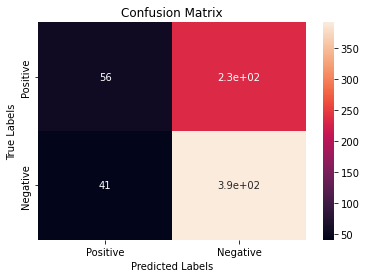

In [160]:
show_accuracy_plot(history_9)
show_loss_plot(history_9)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [161]:
#increased dropout, node count
#decreased batch size
def build_NN10_model():

    model = Sequential()

    model.add(Dense(48, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))

    model.add(Dense(24))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))

    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',             
        metrics=['accuracy']
    )
    return model

model = build_NN10_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 48)                384       
                                                                 
 activation_71 (Activation)  (None, 48)                0         
                                                                 
 dropout_56 (Dropout)        (None, 48)                0         
                                                                 
 dense_90 (Dense)            (None, 24)                1176      
                                                                 
 activation_72 (Activation)  (None, 24)                0         
                                                                 
 dropout_57 (Dropout)        (None, 24)                0         
                                                                 
 dense_91 (Dense)            (None, 1)               

In [162]:
EPOCHS = 100
batch_sz = 75
with tf.device('/GPU:0'):
    history_10 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
44/44 [==============================] - 3s 30ms/step - loss: 0.7217 - accuracy: 0.5406 - val_loss: 0.6800 - val_accuracy: 0.5817
Epoch 2/100
44/44 [==============================] - 1s 21ms/step - loss: 0.7067 - accuracy: 0.5376 - val_loss: 0.6784 - val_accuracy: 0.5789
Epoch 3/100
44/44 [==============================] - 1s 20ms/step - loss: 0.6977 - accuracy: 0.5610 - val_loss: 0.6777 - val_accuracy: 0.5693
Epoch 4/100
44/44 [==============================] - 1s 21ms/step - loss: 0.6870 - accuracy: 0.5732 - val_loss: 0.6776 - val_accuracy: 0.5665
Epoch 5/100
44/44 [==============================] - 1s 22ms/step - loss: 0.6876 - accuracy: 0.5674 - val_loss: 0.6779 - val_accuracy: 0.5623
Epoch 6/100
44/44 [==============================] - 1s 20ms/step - loss: 0.6859 - accuracy: 0.5659 - val_loss: 0.6772 - val_accuracy: 0.5665
Epoch 7/100
44/44 [==============================] - 1s 17ms/step - loss: 0.6797 - accuracy: 0.5871 - val_loss: 0.6766 - val_accuracy: 0.5637
Epoch 

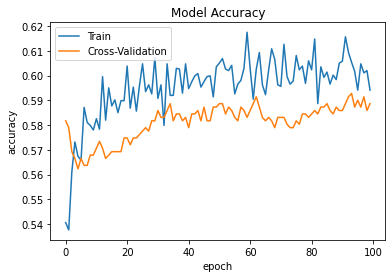

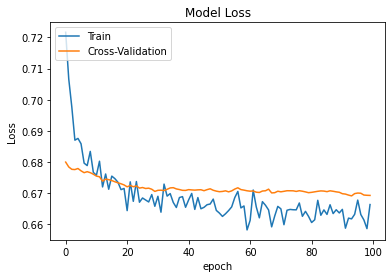



106/106 [==============================] - 1s 10ms/step - loss: 0.6581 - accuracy: 0.6064
Training Accuracy (Final Model): 0.606
Training Loss (Final Model): 0.658


23/23 [==============================] - 0s 10ms/step - loss: 0.6693 - accuracy: 0.5886
Validation Accuracy (Final Model): 0.589
Validation Loss (Final Model): 0.669


23/23 [==============================] - 0s 10ms/step - loss: 0.6602 - accuracy: 0.6136
Test Accuracy (Final Model): 0.614
Test Loss (Final Model): 0.660


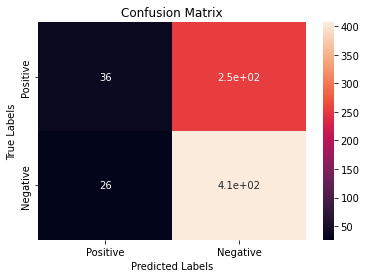

In [163]:
show_accuracy_plot(history_10)
show_loss_plot(history_10)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [164]:
def build_NN11_model():

    model = Sequential()
    model.add(Dense(1024, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

model = build_NN11_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 1024)              8192      
                                                                 
 activation_74 (Activation)  (None, 1024)              0         
                                                                 
 dropout_58 (Dropout)        (None, 1024)              0         
                                                                 
 dense_93 (Dense)            (None, 512)               524800    
                                                                 
 activation_75 (Activation)  (None, 512)               0         
                                                                 
 dropout_59 (Dropout)        (None, 512)               0         
                                                                 
 dense_94 (Dense)            (None, 256)             

In [165]:
EPOCHS = 100
batch_sz = 75
with tf.device('/GPU:0'):
    history_11 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
44/44 [==============================] - 3s 30ms/step - loss: 0.5459 - accuracy: 0.4221 - val_loss: 0.5042 - val_accuracy: 0.4792
Epoch 2/100
44/44 [==============================] - 1s 19ms/step - loss: 0.4959 - accuracy: 0.4970 - val_loss: 0.4694 - val_accuracy: 0.5665
Epoch 3/100
44/44 [==============================] - 1s 18ms/step - loss: 0.4699 - accuracy: 0.5723 - val_loss: 0.4620 - val_accuracy: 0.5900
Epoch 4/100
44/44 [==============================] - 1s 17ms/step - loss: 0.4607 - accuracy: 0.5829 - val_loss: 0.4585 - val_accuracy: 0.5831
Epoch 5/100
44/44 [==============================] - 1s 16ms/step - loss: 0.4527 - accuracy: 0.5841 - val_loss: 0.4542 - val_accuracy: 0.5873
Epoch 6/100
44/44 [==============================] - 1s 16ms/step - loss: 0.4494 - accuracy: 0.5841 - val_loss: 0.4500 - val_accuracy: 0.5845
Epoch 7/100
44/44 [==============================] - 1s 17ms/step - loss: 0.4343 - accuracy: 0.5962 - val_loss: 0.4456 - val_accuracy: 0.5817
Epoch 

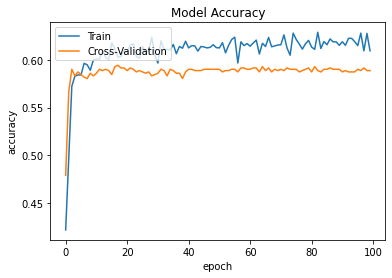

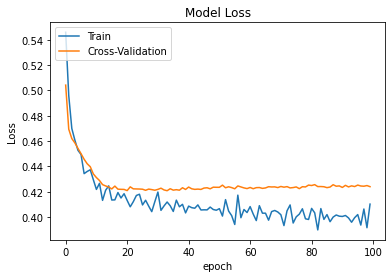



106/106 [==============================] - 1s 10ms/step - loss: 0.3898 - accuracy: 0.6236
Training Accuracy (Final Model): 0.624
Training Loss (Final Model): 0.390


23/23 [==============================] - 0s 10ms/step - loss: 0.4240 - accuracy: 0.5886
Validation Accuracy (Final Model): 0.589
Validation Loss (Final Model): 0.424


23/23 [==============================] - 0s 10ms/step - loss: 0.3982 - accuracy: 0.6163
Test Accuracy (Final Model): 0.616
Test Loss (Final Model): 0.398


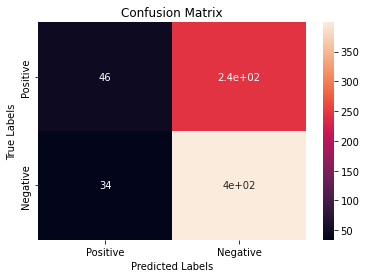

In [166]:
show_accuracy_plot(history_11)
show_loss_plot(history_11)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [167]:
def build_NN13_model():
    model = Sequential()
    model.add(Dense(16, input_dim=normalized_train_df.shape[1], activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(loss='binary_crossentropy',
        optimizer='adam',             #also try adam
        metrics=['accuracy']
    )

    return model

model = build_NN13_model()
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 16)                128       
                                                                 
 dropout_61 (Dropout)        (None, 16)                0         
                                                                 
 dense_97 (Dense)            (None, 1)                 17        
                                                                 
 activation_77 (Activation)  (None, 1)                 0         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [168]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_13 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 35ms/step - loss: 0.7275 - accuracy: 0.4952 - val_loss: 0.6946 - val_accuracy: 0.5235
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 0.7019 - accuracy: 0.5292 - val_loss: 0.6786 - val_accuracy: 0.5859
Epoch 3/100
33/33 [==============================] - 1s 22ms/step - loss: 0.6829 - accuracy: 0.5702 - val_loss: 0.6715 - val_accuracy: 0.5997
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6796 - accuracy: 0.5779 - val_loss: 0.6691 - val_accuracy: 0.5983
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: 0.6707 - accuracy: 0.5993 - val_loss: 0.6680 - val_accuracy: 0.5942
Epoch 6/100
33/33 [==============================] - 1s 17ms/step - loss: 0.6799 - accuracy: 0.5879 - val_loss: 0.6671 - val_accuracy: 0.5997
Epoch 7/100
33/33 [==============================] - 1s 17ms/step - loss: 0.6764 - accuracy: 0.5858 - val_loss: 0.6667 - val_accuracy: 0.6039
Epoch 

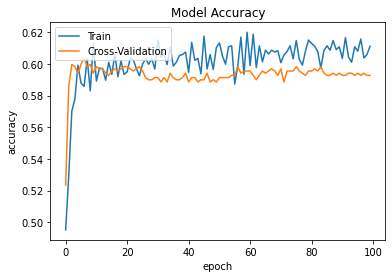

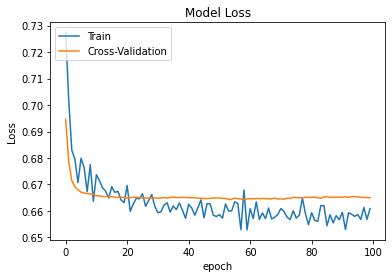



106/106 [==============================] - 1s 11ms/step - loss: 0.6554 - accuracy: 0.6100
Training Accuracy (Final Model): 0.610
Training Loss (Final Model): 0.655


23/23 [==============================] - 0s 10ms/step - loss: 0.6650 - accuracy: 0.5928
Validation Accuracy (Final Model): 0.593
Validation Loss (Final Model): 0.665


23/23 [==============================] - 0s 9ms/step - loss: 0.6586 - accuracy: 0.5997
Test Accuracy (Final Model): 0.600
Test Loss (Final Model): 0.659


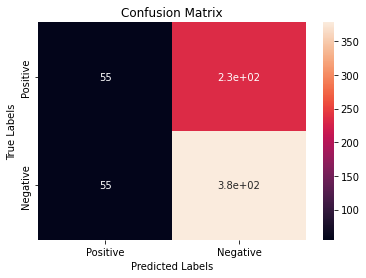

In [169]:
show_accuracy_plot(history_13)
show_loss_plot(history_13)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [170]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df_7)
train_validation_test_shape()


Train/Validation/Test Features
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [171]:
model = build_NN13_model()
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 16)                64        
                                                                 
 dropout_62 (Dropout)        (None, 16)                0         
                                                                 
 dense_99 (Dense)            (None, 1)                 17        
                                                                 
 activation_78 (Activation)  (None, 1)                 0         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [172]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_14 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 32ms/step - loss: 0.7271 - accuracy: 0.5155 - val_loss: 0.7178 - val_accuracy: 0.5083
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 0.7120 - accuracy: 0.5298 - val_loss: 0.7006 - val_accuracy: 0.5374
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6960 - accuracy: 0.5467 - val_loss: 0.6908 - val_accuracy: 0.5346
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 0.6896 - accuracy: 0.5626 - val_loss: 0.6842 - val_accuracy: 0.5499
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: 0.6881 - accuracy: 0.5561 - val_loss: 0.6796 - val_accuracy: 0.5665
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: 0.6813 - accuracy: 0.5567 - val_loss: 0.6762 - val_accuracy: 0.5734
Epoch 7/100
33/33 [==============================] - 1s 17ms/step - loss: 0.6776 - accuracy: 0.5870 - val_loss: 0.6741 - val_accuracy: 0.5803
Epoch 

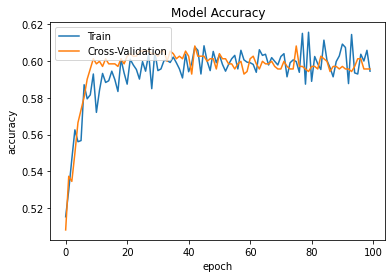

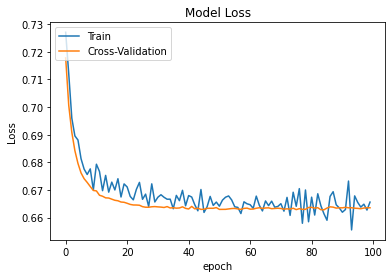



106/106 [==============================] - 1s 11ms/step - loss: 0.6622 - accuracy: 0.6028
Training Accuracy (Final Model): 0.603
Training Loss (Final Model): 0.662


23/23 [==============================] - 0s 13ms/step - loss: 0.6636 - accuracy: 0.5956
Validation Accuracy (Final Model): 0.596
Validation Loss (Final Model): 0.664


23/23 [==============================] - 0s 9ms/step - loss: 0.6632 - accuracy: 0.6025
Test Accuracy (Final Model): 0.602
Test Loss (Final Model): 0.663


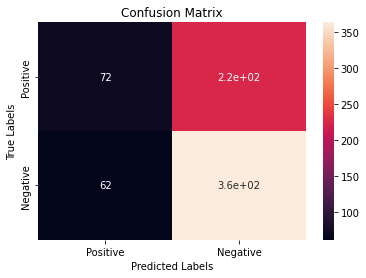

In [173]:
show_accuracy_plot(history_14)
show_loss_plot(history_14)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [174]:
def build_NN16_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

model = build_NN16_model()
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 1024)              4096      
                                                                 
 activation_79 (Activation)  (None, 1024)              0         
                                                                 
 dropout_63 (Dropout)        (None, 1024)              0         
                                                                 
 dense_101 (Dense)           (None, 512)               524800    
                                                                 
 activation_80 (Activation)  (None, 512)               0         
                                                                 
 dropout_64 (Dropout)        (None, 512)               0         
                                                                 
 dense_102 (Dense)           (None, 256)             

In [175]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_16 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 38ms/step - loss: 0.5606 - accuracy: 0.4252 - val_loss: 0.5680 - val_accuracy: 0.3934
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 0.5372 - accuracy: 0.4218 - val_loss: 0.5320 - val_accuracy: 0.4197
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.5077 - accuracy: 0.4686 - val_loss: 0.4923 - val_accuracy: 0.5083
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 0.4776 - accuracy: 0.5641 - val_loss: 0.4639 - val_accuracy: 0.5651
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4638 - accuracy: 0.5806 - val_loss: 0.4548 - val_accuracy: 0.6025
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4546 - accuracy: 0.5824 - val_loss: 0.4484 - val_accuracy: 0.6094
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4498 - accuracy: 0.5870 - val_loss: 0.4425 - val_accuracy: 0.6122
Epoch 

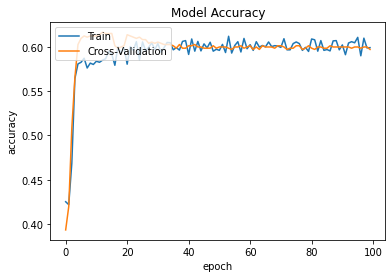

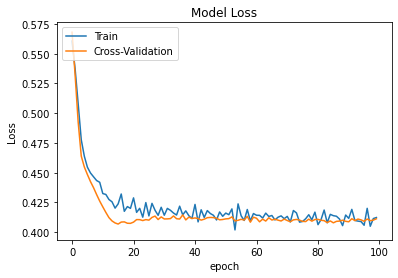



106/106 [==============================] - 1s 10ms/step - loss: 0.4070 - accuracy: 0.6023
Training Accuracy (Final Model): 0.602
Training Loss (Final Model): 0.407


23/23 [==============================] - 0s 10ms/step - loss: 0.4113 - accuracy: 0.5970
Validation Accuracy (Final Model): 0.597
Validation Loss (Final Model): 0.411


23/23 [==============================] - 0s 10ms/step - loss: 0.4053 - accuracy: 0.6108
Test Accuracy (Final Model): 0.611
Test Loss (Final Model): 0.405


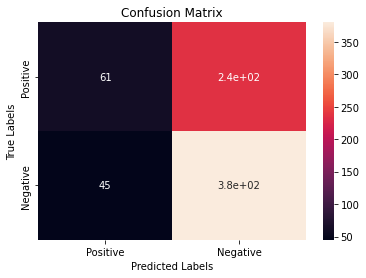

In [176]:
show_accuracy_plot(history_16)
show_loss_plot(history_16)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [179]:
loss, train_accuracy = model.evaluate(normalized_train_df, train_label)
loss, test_accuracy = model.evaluate(normalized_test_df, test_label)
data = {
    "model": model,
    "training_model_acc": train_accuracy,
    "test_model_acc": test_accuracy,
}
with open('saved_steps_NN', 'wb') as file:
    pickle.dump(data, file)

23/23 [==============================] - 0s 9ms/step - loss: 0.4053 - accuracy: 0.6108
INFO:tensorflow:Assets written to: ram://ea61ae1c-e075-4fbf-8ef3-6ada2064f499/assets
